In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import visualization
import preprocessing

In [3]:
df_test = visualization.json_to_df('../data/raw/test.json')

In [4]:
print('head.words with length < 3')
[word for word in np.unique(df_test['head.word']) if len(word) < 3]

head.words with length < 3


['3M', 'AZ', 'Bo', 'Ed', 'FX', 'Sy', 'UK', 'VX', 'Yu']

In [5]:
print('tail.words with length < 3')
[word for word in np.unique(df_test['tail.word']) if len(word) < 3]

tail.words with length < 3


['3M', 'AZ', 'Bo', 'Ed', 'FX', 'Sy', 'UK', 'VX', 'Yu']

In [6]:
def prepare_data(df):
    df_clean = preprocessing.add_sentence_length(df)
    
    print('Long sentences:\n')
    long_sentences = df_clean[df_clean['sentence.length'] > 2000]    
    for index, row in long_sentences.iterrows():
        print(row['sentence.length'])
        print(row['sentence'])
        print()
    
    df_clean = preprocessing.remove_outlier_sentence_lengths(df_clean)
    
    print('Box plot of sentence length WITHOUT outliers')
    df_clean['sentence.length'].plot.box()
    
    df_clean = df_clean[['head.word', 'tail.word', 'sentence', 'relation']]
    return df_clean

Long sentences:

Removed 2 outliers

Box plot of sentence length WITHOUT outliers


,head.word,tail.word,sentence,relation
0,Arthur Schnitzler,Vienna,"The Little Comedy , '' a mannered operetta bas...",/people/person/place_of_birth
1,Roberto Calvi,Italy,A court in Rome acquitted five people accused ...,/people/person/nationality
2,Johnny Rivers,Louisiana,There were also performers who were born in Lo...,/people/person/place_lived
3,Philippines,San Carlos City,"When Julian Resuello , the mayor of San Carlos...",/location/location/contains
4,Alex Salmond,Scotland,"A3 Concern Raised by Libya Deal Alex Salmond ,...",/people/person/nationality
5,Alex Salmond,Scotland,"Alex Salmond , the newly elected first ministe...",/people/person/nationality
6,Evo Morales,Bolivia,"Indeed , Mr. Chávez said Sunday that he wished...",/people/person/nationality
7,Evo Morales,Bolivia,"They suggest that if elected , he would immedi...",/people/person/nationality
8,Evo Morales,Bolivia,Another outstanding selection is Alejandro Lan...,/people/person/nationality
9,Evo Morales,Bolivia,A8 More Criticism for Evo Morales Political op...,/people/person/nationality


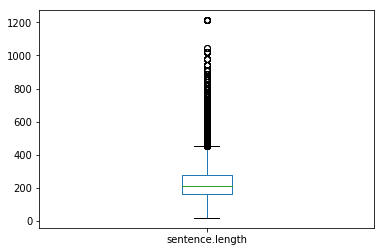

In [7]:
df_test_clean = prepare_data(df_test)
df_test_clean
df_test_clean.to_csv('../data/test/test.csv')

In [8]:
df_train = visualization.json_to_df('../data/raw/train.json')

In [9]:
print('head.words with length < 3')
[word for word in np.unique(df_train['head.word']) if len(word) < 3]

head.words with length < 3


['3M',
 'AZ',
 'Bo',
 'CT',
 'Ed',
 'FX',
 'GQ',
 'KB',
 'Li',
 'MG',
 'Oz',
 'UA',
 'UK',
 'Ur',
 'Wu']

In [10]:
print('tail.words with length < 3')
[word for word in np.unique(df_train['tail.word']) if len(word) < 3]

tail.words with length < 3


['3M',
 'AZ',
 'Bo',
 'CT',
 'Ed',
 'FX',
 'GQ',
 'KB',
 'Li',
 'Lo',
 'MG',
 'Mo',
 'Re',
 'UA',
 'UK',
 'WC',
 'Wu',
 'Yu']

Long sentences:

4033
Below , the nominees in each category : BEST PICTURE '' The Aviator '' '' Finding Neverland '' '' Million Dollar Baby '' '' Ray '' '' Sideways '' ACTOR Don Cheadle , '' Hotel Rwanda '' Johnny Depp , '' Finding Neverland '' Leonardo DiCaprio , '' The Aviator '' Clint Eastwood , '' Million Dollar Baby '' Jamie Foxx , '' Ray '' ACTRESS Annette Bening , '' Being Julia '' Catalina Sandino Moreno , '' Maria Full of Grace '' Imelda Staunton , '' Vera Drake '' Hilary Swank , '' Million Dollar Baby '' Kate Winslet , '' Eternal Sunshine of the Spotless Mind '' SUPPORTING ACTOR Alan Alda , '' The Aviator '' Thomas Haden Church , '' Sideways '' Jamie Foxx , '' Collateral '' Morgan Freeman , '' Million Dollar Baby '' Clive Owen , '' Closer '' SUPPORTING ACTRESS Cate Blanchett , '' The Aviator '' Laura Linney , '' Kinsey '' Virginia Madsen , '' Sideways '' Sophie Okonedo , '' Hotel Rwanda '' Natalie Portman , '' Closer '' DIRECTOR Martin Scorsese , '' The Aviator '' Clint Eastw

Removed 94 outliers

Box plot of sentence length WITHOUT outliers


,head.word,tail.word,sentence,relation
0,Syracuse,Onondaga Lake,She also oversaw the refinancing of the state ...,/location/location/contains
1,Syracuse,Onondaga Lake,More than 2.5 million cubic yards of contamina...,/location/location/contains
2,Syracuse,Onondaga Lake,"The Onondaga Nation has about 1,500 members , ...",/location/location/contains
3,Turkey,Adana,He was born in Istanbul but raised in the east...,/location/location/contains
4,Turkey,Adana,"By the end of his most recent tour , Rollins h...",/location/location/contains
5,Queens,Belle Harbor,One was for St. Francis de Sales Roman Catholi...,/location/location/contains
6,Queens,Belle Harbor,"But instead there was a funeral , at St. Franc...",/location/location/contains
7,Queens,Belle Harbor,"Rosemary Antonelle , the daughter of Teresa L....",/location/location/contains
8,Queens,Belle Harbor,She is a daughter of Marion I. Rabbin and Dr. ...,/location/location/contains
9,Queens,Belle Harbor,"The firefighter , whom a Fire Department offic...",/location/location/contains


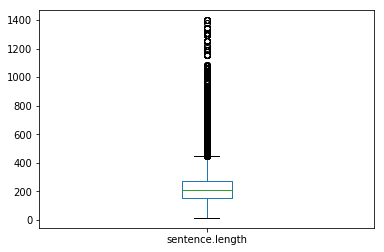

In [11]:
df_train_clean = prepare_data(df_train)
df_train_clean
df_train_clean.to_csv('../data/train/train.csv')